<center><h1>Integrated project DS II</h1><h2>Prototype of a machine learning model for Zyfra</h2></center>

<b><u>Description:</u></b>

Prepare a prototype of a machine learning model for Zyfra. The company develops efficiency solutions for heavy industry

- Predict the amount of gold recovered from gold ore , You have the data on extraction and purification

- Model that will help to optimize the production and eliminate unprofitable parameters

<hr><div class="alert alert-block alert-info" style="margin-top: 20px"><b style="font-size: 17px;" id="index">Index Menu:</b> 
<br><br>  
<a href="#Step I">Step I - Prepare the data</a>
<br><br>     
<a href="#Step II">Step II - Analyze the data</a>
<br> <br>    
<a href="#Step III">Step III - Build the model</a>
<br><br> 
<a href="#general_conclusion">General conclusion</a>   
</div>

<hr><div id="Step I"><h2>Step I - Download and prepare the data. Explain the procedure</h2><br><i>Loading all the libraries: pandas,numpy,matplotlib,etc</i></div>

<a href="#index"><button style=" background-color: #04AA6D; border: none; color: white; padding: 10px; text-align: center; text-decoration: none; display: inline-block; font-size: 12px; margin: 3px 2px; border-radius: 12px; font-weight: bold;"> Return to index menu</button></a>

In [1]:
# import pandas and numpy for data preprocessing and manipulation
import pandas as pd
import numpy as np
import re

# seaborn for visualization
import seaborn as sns
sns.set_style("darkgrid")

# matplotlib for visualization
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# import scipy modules
from scipy import stats as st

# import sklearn modules
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor

# import warnings and display html
import warnings
warnings.filterwarnings('ignore')
from itertools import chain,cycle

print('Project libraries has been successfully been imported!')

Project libraries has been successfully been imported!


In [2]:
# read the data
try:
    grtrain = pd.read_csv('/datasets/gold_recovery_train.csv')
    grtest = pd.read_csv('/datasets/gold_recovery_test.csv')
    grfull = pd.read_csv('/datasets/gold_recovery_full.csv')
    
except:
    grtrain = pd.read_csv('gold_recovery_train.csv')
    grtest = pd.read_csv('gold_recovery_test.csv')
    grfull = pd.read_csv('gold_recovery_full.csv')     
    
print('Data has been read correctly!')

Data has been read correctly!


In [3]:
# Checking 0's
def zero_check(df):
    for i in df:
        print(i,len(df[df[i]==0]))
        
# function to determine if columns in file have null values        
def get_percent_of_na(df, num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index, s.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('{} has {} nulls, which is {:.{}%} percent of Nulls'.format(column, num_of_nulls, percent, num))
    if count != 0:
        print("\033[1m" + 'There are {} columns with NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'There are no columns with NA.' + "\033[0m")       
        
# function to display general information about the dataset
def general_info(df):
    print("\033[1m" + "\033[0m")
    display(pd.concat([df.dtypes, df.count(),df.isna().sum(),df.isna().sum()/len(df)], keys=['type','count','na','na%'],
                      axis=1))
    print()
    print("\033[1m" + 'Head:')  
    display(df.head())
    print()
    print("\033[1m" + 'Tail:')
    display(df.tail())
    print()
    print("\033[1m" + 'Info:')
    print()
    display(df.info())
    print()
    print("\033[1m" + 'Describe:')
    print()
    display(df.describe())
    print()
    print("\033[1m" + 'Describe include: all :')
    print()
    display(df.describe(include='all'))
    print()
    print("\033[1m" + 'nulls in the columns:')
    print()
    display(get_percent_of_na(df, 4))  # check this out
    print()
    print("\033[1m" + 'Zeros in the columns:') 
    print()
    display(zero_check(df))
    print()
    print("\033[1m" + 'Shape:', df.shape)
    print()
    print()
    print('Duplicated:',"\033[1m" + 'We have {} duplicated rows\n'.format(df.duplicated().sum()) + "\033[0m")
    print()
    print("\033[1m" + 'Dtypes:')  
    display(df.dtypes)
    print()

In [4]:
#print our info data
print('information about Our "gold_recovery_train" dataset:')
general_info(grtrain)
print()
print('information about Our "gold_recovery_test" dataset:')
general_info(grtest)
print()
print('information about Our "gold_recovery_full" dataset:')
general_info(grfull)

information about Our "gold_recovery_train" dataset:



,type,count,na,na%
date,object,16860,0,0.000000
final.output.concentrate_ag,float64,16788,72,0.004270
final.output.concentrate_pb,float64,16788,72,0.004270
final.output.concentrate_sol,float64,16490,370,0.021945
final.output.concentrate_au,float64,16789,71,0.004211
...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,float64,16775,85,0.005042
secondary_cleaner.state.floatbank5_b_air,float64,16775,85,0.005042
secondary_cleaner.state.floatbank5_b_level,float64,16776,84,0.004982
secondary_cleaner.state.floatbank6_a_air,float64,16757,103,0.006109



Head:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691



Tail:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
16859,2018-08-18 10:59:59,3.598375,11.737832,6.717509,46.299438,70.281454,8.406690,2.517518,10.652193,1.389434,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575



Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  

None


Describe:



,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927



Describe include: all :



,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16860,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
unique,16860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-04-25 15:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,NaN,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,NaN,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,NaN,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,NaN,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540



nulls in the columns:

final.output.concentrate_ag has 72 nulls, which is 0.4270% percent of Nulls
final.output.concentrate_pb has 72 nulls, which is 0.4270% percent of Nulls
final.output.concentrate_sol has 370 nulls, which is 2.1945% percent of Nulls
final.output.concentrate_au has 71 nulls, which is 0.4211% percent of Nulls
final.output.recovery has 1521 nulls, which is 9.0214% percent of Nulls
final.output.tail_ag has 66 nulls, which is 0.3915% percent of Nulls
final.output.tail_pb has 183 nulls, which is 1.0854% percent of Nulls
final.output.tail_sol has 145 nulls, which is 0.8600% percent of Nulls
final.output.tail_au has 66 nulls, which is 0.3915% percent of Nulls
primary_cleaner.input.sulfate has 1307 nulls, which is 7.7521% percent of Nulls
primary_cleaner.input.depressant has 1262 nulls, which is 7.4852% percent of Nulls
primary_cleaner.input.xanthate has 985 nulls, which is 5.8422% percent of Nulls
primary_cleaner.output.concentrate_ag has 82 nulls, which is 0.4864% percent

None


Zeros in the columns:

date 0
final.output.concentrate_ag 1263
final.output.concentrate_pb 1263
final.output.concentrate_sol 1263
final.output.concentrate_au 1263
final.output.recovery 89
final.output.tail_ag 1658
final.output.tail_pb 1658
final.output.tail_sol 1658
final.output.tail_au 1658
primary_cleaner.input.sulfate 0
primary_cleaner.input.depressant 57
primary_cleaner.input.feed_size 0
primary_cleaner.input.xanthate 0
primary_cleaner.output.concentrate_ag 1230
primary_cleaner.output.concentrate_pb 1230
primary_cleaner.output.concentrate_sol 1230
primary_cleaner.output.concentrate_au 1230
primary_cleaner.output.tail_ag 1549
primary_cleaner.output.tail_pb 1549
primary_cleaner.output.tail_sol 1549
primary_cleaner.output.tail_au 1549
primary_cleaner.state.floatbank8_a_air 256
primary_cleaner.state.floatbank8_a_level 0
primary_cleaner.state.floatbank8_b_air 257
primary_cleaner.state.floatbank8_b_level 0
primary_cleaner.state.floatbank8_c_air 282
primary_cleaner.state.floatbank8_c_lev

None


Shape: (16860, 87)


Duplicated: We have 0 duplicated rows


Dtypes:


date                                           object
final.output.concentrate_ag                   float64
final.output.concentrate_pb                   float64
final.output.concentrate_sol                  float64
final.output.concentrate_au                   float64
                                               ...   
secondary_cleaner.state.floatbank5_a_level    float64
secondary_cleaner.state.floatbank5_b_air      float64
secondary_cleaner.state.floatbank5_b_level    float64
secondary_cleaner.state.floatbank6_a_air      float64
secondary_cleaner.state.floatbank6_a_level    float64
Length: 87, dtype: object



information about Our "gold_recovery_test" dataset:



,type,count,na,na%
date,object,5856,0,0.000000
primary_cleaner.input.sulfate,float64,5554,302,0.051571
primary_cleaner.input.depressant,float64,5572,284,0.048497
primary_cleaner.input.feed_size,float64,5856,0,0.000000
primary_cleaner.input.xanthate,float64,5690,166,0.028347
primary_cleaner.state.floatbank8_a_air,float64,5840,16,0.002732
primary_cleaner.state.floatbank8_a_level,float64,5840,16,0.002732
primary_cleaner.state.floatbank8_b_air,float64,5840,16,0.002732
primary_cleaner.state.floatbank8_b_level,float64,5840,16,0.002732
primary_cleaner.state.floatbank8_c_air,float64,5840,16,0.002732



Head:


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333



Tail:


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
5851,2017-12-31 19:59:59,173.957757,15.963399,8.07,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.07,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.07,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.07,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284
5855,2017-12-31 23:59:59,181.556856,14.995850,8.07,1.623454,1498.096303,-499.796922,1501.743791,-505.146931,1499.535978,...,20.034715,-500.728588,14.914199,-499.948518,10.986607,-500.658027,8.989497,-500.337588,8.988632,-500.764937



Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  prim

None


Describe:



,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593



Describe include: all :



,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5856,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
unique,5856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-11-21 01:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,NaN,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,NaN,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,NaN,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,NaN,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,NaN,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621



nulls in the columns:

primary_cleaner.input.sulfate has 302 nulls, which is 5.1571% percent of Nulls
primary_cleaner.input.depressant has 284 nulls, which is 4.8497% percent of Nulls
primary_cleaner.input.xanthate has 166 nulls, which is 2.8347% percent of Nulls
primary_cleaner.state.floatbank8_a_air has 16 nulls, which is 0.2732% percent of Nulls
primary_cleaner.state.floatbank8_a_level has 16 nulls, which is 0.2732% percent of Nulls
primary_cleaner.state.floatbank8_b_air has 16 nulls, which is 0.2732% percent of Nulls
primary_cleaner.state.floatbank8_b_level has 16 nulls, which is 0.2732% percent of Nulls
primary_cleaner.state.floatbank8_c_air has 16 nulls, which is 0.2732% percent of Nulls
primary_cleaner.state.floatbank8_c_level has 16 nulls, which is 0.2732% percent of Nulls
primary_cleaner.state.floatbank8_d_air has 16 nulls, which is 0.2732% percent of Nulls
primary_cleaner.state.floatbank8_d_level has 16 nulls, which is 0.2732% percent of Nulls
rougher.input.feed_ag has 16 nu

None


Zeros in the columns:

date 0
primary_cleaner.input.sulfate 0
primary_cleaner.input.depressant 0
primary_cleaner.input.feed_size 0
primary_cleaner.input.xanthate 0
primary_cleaner.state.floatbank8_a_air 93
primary_cleaner.state.floatbank8_a_level 0
primary_cleaner.state.floatbank8_b_air 88
primary_cleaner.state.floatbank8_b_level 0
primary_cleaner.state.floatbank8_c_air 48
primary_cleaner.state.floatbank8_c_level 0
primary_cleaner.state.floatbank8_d_air 48
primary_cleaner.state.floatbank8_d_level 0
rougher.input.feed_ag 369
rougher.input.feed_pb 369
rougher.input.feed_rate 0
rougher.input.feed_size 0
rougher.input.feed_sol 369
rougher.input.feed_au 369
rougher.input.floatbank10_sulfate 0
rougher.input.floatbank10_xanthate 0
rougher.input.floatbank11_sulfate 0
rougher.input.floatbank11_xanthate 0
rougher.state.floatbank10_a_air 0
rougher.state.floatbank10_a_level 0
rougher.state.floatbank10_b_air 0
rougher.state.floatbank10_b_level 0
rougher.state.floatbank10_c_air 0
rougher.state.floa

None


Shape: (5856, 53)


Duplicated: We have 0 duplicated rows


Dtypes:


date                                           object
primary_cleaner.input.sulfate                 float64
primary_cleaner.input.depressant              float64
primary_cleaner.input.feed_size               float64
primary_cleaner.input.xanthate                float64
primary_cleaner.state.floatbank8_a_air        float64
primary_cleaner.state.floatbank8_a_level      float64
primary_cleaner.state.floatbank8_b_air        float64
primary_cleaner.state.floatbank8_b_level      float64
primary_cleaner.state.floatbank8_c_air        float64
primary_cleaner.state.floatbank8_c_level      float64
primary_cleaner.state.floatbank8_d_air        float64
primary_cleaner.state.floatbank8_d_level      float64
rougher.input.feed_ag                         float64
rougher.input.feed_pb                         float64
rougher.input.feed_rate                       float64
rougher.input.feed_size                       float64
rougher.input.feed_sol                        float64
rougher.input.feed_au       



information about Our "gold_recovery_full" dataset:



,type,count,na,na%
date,object,22716,0,0.000000
final.output.concentrate_ag,float64,22627,89,0.003918
final.output.concentrate_pb,float64,22629,87,0.003830
final.output.concentrate_sol,float64,22331,385,0.016948
final.output.concentrate_au,float64,22630,86,0.003786
...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,float64,22615,101,0.004446
secondary_cleaner.state.floatbank5_b_air,float64,22615,101,0.004446
secondary_cleaner.state.floatbank5_b_level,float64,22616,100,0.004402
secondary_cleaner.state.floatbank6_a_air,float64,22597,119,0.005239



Head:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691



Tail:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
22715,2018-08-18 10:59:59,3.598375,11.737832,6.717509,46.299438,70.281454,8.406690,2.517518,10.652193,1.389434,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575



Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  

None


Describe:



,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593



Describe include: all :



,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22716,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
unique,22716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-11-21 01:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,NaN,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,NaN,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,NaN,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,NaN,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388



nulls in the columns:

final.output.concentrate_ag has 89 nulls, which is 0.3918% percent of Nulls
final.output.concentrate_pb has 87 nulls, which is 0.3830% percent of Nulls
final.output.concentrate_sol has 385 nulls, which is 1.6948% percent of Nulls
final.output.concentrate_au has 86 nulls, which is 0.3786% percent of Nulls
final.output.recovery has 1963 nulls, which is 8.6415% percent of Nulls
final.output.tail_ag has 83 nulls, which is 0.3654% percent of Nulls
final.output.tail_pb has 200 nulls, which is 0.8804% percent of Nulls
final.output.tail_sol has 271 nulls, which is 1.1930% percent of Nulls
final.output.tail_au has 81 nulls, which is 0.3566% percent of Nulls
primary_cleaner.input.sulfate has 1609 nulls, which is 7.0831% percent of Nulls
primary_cleaner.input.depressant has 1546 nulls, which is 6.8058% percent of Nulls
primary_cleaner.input.xanthate has 1151 nulls, which is 5.0669% percent of Nulls
primary_cleaner.output.concentrate_ag has 98 nulls, which is 0.4314% percen

None


Zeros in the columns:

date 0
final.output.concentrate_ag 1613
final.output.concentrate_pb 1613
final.output.concentrate_sol 1613
final.output.concentrate_au 1613
final.output.recovery 151
final.output.tail_ag 1950
final.output.tail_pb 1950
final.output.tail_sol 1950
final.output.tail_au 1950
primary_cleaner.input.sulfate 0
primary_cleaner.input.depressant 57
primary_cleaner.input.feed_size 0
primary_cleaner.input.xanthate 0
primary_cleaner.output.concentrate_ag 1626
primary_cleaner.output.concentrate_pb 1626
primary_cleaner.output.concentrate_sol 1626
primary_cleaner.output.concentrate_au 1626
primary_cleaner.output.tail_ag 1953
primary_cleaner.output.tail_pb 1953
primary_cleaner.output.tail_sol 1953
primary_cleaner.output.tail_au 1953
primary_cleaner.state.floatbank8_a_air 349
primary_cleaner.state.floatbank8_a_level 0
primary_cleaner.state.floatbank8_b_air 345
primary_cleaner.state.floatbank8_b_level 0
primary_cleaner.state.floatbank8_c_air 330
primary_cleaner.state.floatbank8_c_le

None


Shape: (22716, 87)


Duplicated: We have 0 duplicated rows


Dtypes:


date                                           object
final.output.concentrate_ag                   float64
final.output.concentrate_pb                   float64
final.output.concentrate_sol                  float64
final.output.concentrate_au                   float64
                                               ...   
secondary_cleaner.state.floatbank5_a_level    float64
secondary_cleaner.state.floatbank5_b_air      float64
secondary_cleaner.state.floatbank5_b_level    float64
secondary_cleaner.state.floatbank6_a_air      float64
secondary_cleaner.state.floatbank6_a_level    float64
Length: 87, dtype: object

<hr><b style="font-size: 14px;">Three gold recovery data sets:</b>

"gold_recovery_train" we call "grtrain" : 16860 rows and 87 columns

"gold_recovery_test" we call "grtest" : 5856 rows and 53 columns

"gold_recovery_full" we call "grfull" : 22715 rows and 87 columns

<b><u>Missing Values:</u></b>

Since our dataset 'Train' and 'Test' split from the full dataset, they contain missing values compare to the full dataset

<b><u>Duplicated:</u></b>

Doesn't contain any duplicates

<hr><h3>B. Check that recovery is calculated correctly. Using the training set, calculate recovery for the rougher.output.recovery feature.</h3><h4>Find the MAE between your calculations and the feature values</h4>

In [5]:
#Check our target column to see is len and if there is any missing values
print("\033[4mRecovery column:\033[0m")
print('Length:', len(grtrain['rougher.output.recovery']))
print('NaN values:', grtrain['rougher.output.recovery'].isna().sum())

Recovery column:
Length: 16860
NaN values: 2573


In [6]:
#We build New Dataframe "Nd", drop from him the missing value and only put the columns we want to calc "MAE"
Nd = grtrain['rougher.output.recovery'],grtrain['rougher.output.concentrate_au'],grtrain['rougher.input.feed_au'],\
grtrain['rougher.output.tail_au']
Columns = ['rougher.output.recovery','rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au']
Newdf = pd.concat(Nd, axis=1, keys=Columns)
Newdf = Newdf.dropna()
display(Newdf)

,rougher.output.recovery,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au
0,87.107763,19.793808,6.486150,1.170244
1,86.843261,20.050975,6.478583,1.184827
2,86.842308,19.737170,6.362222,1.162562
3,87.226430,19.320810,6.118189,1.079755
4,86.688794,19.216101,5.663707,1.012642
...,...,...,...,...
16855,89.574376,18.603550,5.335862,0.748633
16856,87.724007,18.441436,4.838619,0.771582
16857,88.890579,15.111231,4.525061,0.685059
16858,89.858126,17.834772,4.362781,0.567130


In [7]:
#Improve our fn for calc recovery after we did floatation & training set
def rec(C_rougher, F_rougher, T_rougher):
    recovery = (C_rougher * (F_rougher - T_rougher)) / (F_rougher * (C_rougher - T_rougher)) * 100
    print(recovery)
    print()
    print('NaN in the Recovery calc:', recovery.isna().sum())   
    print()
    print('Recovery amount of values after the flotation:', (len(recovery) - (recovery.isna().sum())))
    return(recovery)
recovery = rec(Newdf['rougher.output.concentrate_au'],Newdf['rougher.input.feed_au'],Newdf['rougher.output.tail_au'])

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 14287, dtype: float64

NaN in the Recovery calc: 0

Recovery amount of values after the flotation: 14287


In [8]:
#Creating a list to save comparing values for MAE calculation from the rougher.output.recovery column. Eliminating NaNs.
features_roughermae = grtrain['rougher.output.recovery']
features_roughermae = features_roughermae.dropna()
display(features_roughermae)
print('NaN values in the Recovery after flotation:', features_roughermae.isna().sum())   
print()
print('Recovery amount of values after the flotation:', len(features_roughermae))

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: rougher.output.recovery, Length: 14287, dtype: float64

NaN values in the Recovery after flotation: 0

Recovery amount of values after the flotation: 14287


In [9]:
print('mean_absolute_error:', (mean_absolute_error(features_roughermae, recovery)))

mean_absolute_error: 9.303415616264301e-15


<hr><h3>C. Analyze the features not available in the test set. What are these parameters? What is their type?</h3>

In [10]:
#let's see the find name in different columns
print(set(grtrain.columns).symmetric_difference(grtest.columns))

{'primary_cleaner.output.tail_sol', 'final.output.concentrate_sol', 'rougher.calculation.au_pb_ratio', 'secondary_cleaner.output.tail_pb', 'final.output.tail_au', 'primary_cleaner.output.tail_au', 'final.output.tail_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_pb', 'final.output.tail_sol', 'rougher.output.concentrate_sol', 'secondary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_ag', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'final.output.tail_pb', 'primary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_au', 'primary_cleaner.output.concentrate_au', 'rougher.output.tail_ag', 'rougher.output.recovery', 'primary_cleaner.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.tail_sol', 'rougher.output.tail_au', 'rougher.output.concentrate_au', 'final.output.concentrate_ag', 'secondary_cleaner.output.tail_ag', 'rougher.output.tail_pb', 'rougher.calculation.sulfate_to_au_concentrate',

In [11]:
#Creating a df to store those columns to be able to display the data types. Just copy and paste of the list obtained.
differences = grtrain[['rougher.output.tail_au','rougher.output.tail_sol','final.output.concentrate_au',
                       'rougher.output.concentrate_au','final.output.concentrate_ag','secondary_cleaner.output.tail_pb',
                       'final.output.concentrate_pb','primary_cleaner.output.concentrate_au',
                       'rougher.calculation.sulfate_to_au_concentrate','rougher.calculation.floatbank10_sulfate_to_au_feed',
                       'rougher.calculation.floatbank11_sulfate_to_au_feed','secondary_cleaner.output.tail_ag', 
                          'primary_cleaner.output.concentrate_pb','rougher.output.tail_ag','rougher.output.tail_pb',
                       'final.output.tail_pb','final.output.tail_au','primary_cleaner.output.concentrate_ag',
                       'rougher.output.concentrate_sol','primary_cleaner.output.tail_ag','primary_cleaner.output.tail_pb',
                          'primary_cleaner.output.tail_au','primary_cleaner.output.tail_sol', 'rougher.output.recovery',
                       'secondary_cleaner.output.tail_au','secondary_cleaner.output.tail_sol',
                       'primary_cleaner.output.concentrate_sol','rougher.output.concentrate_ag','final.output.tail_sol', 
                          'rougher.output.concentrate_pb','final.output.recovery','rougher.calculation.au_pb_ratio',
                       'final.output.tail_ag','final.output.concentrate_sol']]

In [12]:
differences.dtypes

rougher.output.tail_au                                float64
rougher.output.tail_sol                               float64
final.output.concentrate_au                           float64
rougher.output.concentrate_au                         float64
final.output.concentrate_ag                           float64
secondary_cleaner.output.tail_pb                      float64
final.output.concentrate_pb                           float64
primary_cleaner.output.concentrate_au                 float64
rougher.calculation.sulfate_to_au_concentrate         float64
rougher.calculation.floatbank10_sulfate_to_au_feed    float64
rougher.calculation.floatbank11_sulfate_to_au_feed    float64
secondary_cleaner.output.tail_ag                      float64
primary_cleaner.output.concentrate_pb                 float64
rougher.output.tail_ag                                float64
rougher.output.tail_pb                                float64
final.output.tail_pb                                  float64
final.ou

<hr><h3>D.Perform data preprocessing</h3>

In [13]:
#remove all the missing values from our dataset
grtrain = grtrain.dropna(how='any')
grtest = grtest.dropna(how='any')
print("\033[4mNans:\033[0m")
print('train:', grtrain.isna().sum().sum(),'\ntest:', grtest.isna().sum().sum())
print()
print("\033[4mShape:\033[0m")
print('Train:', grtrain.shape , '\nTest:', grtest.shape)

Nans:
train: 0 
test: 0

Shape:
Train: (11017, 87) 
Test: (5383, 53)


<h2>Step I - Conclusion</h2>

What we found so far :

We have 3 datasets : 

- "gold train" we call "grtrain" : 16860 rows and 87 columns

- "gold test" we call "grtest" : 5856 rows and 53 columns

- "gold full" we call "grfull" : 22715 rows and 87 columns

which already split from the full dataset , Merage the train and test datasets we get the full one , we found that Test missing out a calc of 34 columns.

<hr>

<b>B. Check that recovery is calculated correctly. Using the training set, calculate recovery for the rougher.output.recovery feature. Find the MAE between your calculations and the feature values</b>

As we see there is need to understand if the recovery column provide by features values in our processes is calc correctly or not. to do it we need to get rid of our missing values (AKA :NaNs) that show in this column our current target. after that we can define a function to calc this column with: 

![Recovery formula](https://pictures.s3.yandex.net/resources/Recovery_1576238822_1589899219.jpg)

And save the array result from the recovery function to compere it to ['rougher.output.recovery'] column , our result of this compression with the help of MAE (AKA : mean absolute error function): 9.303415616264301e-15.

We can see clearly that the value of the two array to my calc and column is almost identical

<hr>
<b>C. Analyze the features not available in the test set. What are these parameters? What is their type?</b>

Our different numbers of row in the two dataset, derive from the fact that our full dataset we split and for this reason the most important different among the two is the number of columns. in our test dataset there is 34 missing columns and we need to identify there dtype to find it we use the line code :"set(grtrain.columns).symmetric_difference(grtest.columns" , we can see all of the our float type and most of them represent output and calc value.

<hr>
<b>D.Perform data preprocessing</b><br>
to keep our data pre process we decied to drop all the missing values (NaNs) from our dataset test and train so the final shape we got is 

Shape:
- Train: (11017, 87) 
- Test: (5383, 53)

 <hr><div id="Step II"><h2>Step II - Analyze the data</h2><br></div>

<a href="#index"><button style=" background-color: #04AA6D; border: none; color: white; padding: 10px; text-align: center; text-decoration: none; display: inline-block; font-size: 12px; margin: 3px 2px; border-radius: 12px; font-weight: bold;"> Return to index menu</button></a>

<hr><h3>A.Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage</h3>

In [14]:
#Calc mean for every interested column
print()
print('\033[4mConcentration of substances as flotation input:\033[0m')
print('Mean of concentrate AU before floatation:', grtrain['rougher.input.feed_au'].mean())
print('Mean of concentrate AG before floatation:', grtrain['rougher.input.feed_ag'].mean())
print('Mean of concentrate PB before floatation:', grtrain['rougher.input.feed_pb'].mean())
print()
print('\033[4mConcentration after floatation:\033[0m')
print('Mean of concentrate AU after floatation:', grtrain['rougher.output.concentrate_au'].mean())
print('Mean of concentrate AG after floatation:', grtrain['rougher.output.concentrate_ag'].mean())
print('Mean of concentrate PB after floatation:', grtrain['rougher.output.concentrate_pb'].mean())
print()
print('\033[4mConcentration after primary cleaner:\033[0m')
print('Mean of concentrate AU after primary purification:', 
      grtrain['primary_cleaner.output.concentrate_au'].mean())
print('Mean of concentrate AG after primary purification:', 
      grtrain['primary_cleaner.output.concentrate_ag'].mean())
print('Mean of concentrate PB after primary purification:', 
      grtrain['primary_cleaner.output.concentrate_pb'].mean())


Concentration of substances as flotation input:
Mean of concentrate AU before floatation: 8.107739070690842
Mean of concentrate AG before floatation: 8.773064688275284
Mean of concentrate PB before floatation: 3.5547770221834445

Concentration after floatation:
Mean of concentrate AU after floatation: 19.77678757319102
Mean of concentrate AG after floatation: 11.841981713010684
Mean of concentrate PB after floatation: 7.612322661398414

Concentration after primary cleaner:
Mean of concentrate AU after primary purification: 32.38098577165496
Mean of concentrate AG after primary purification: 8.437250750365493
Mean of concentrate PB after primary purification: 9.574923645477947


Mean concentration AU, AG, PB:


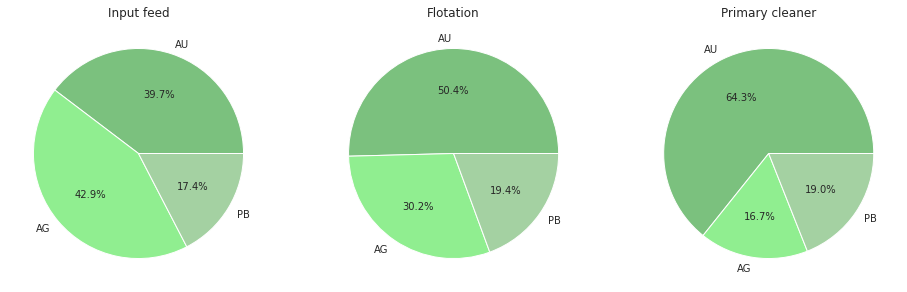

In [15]:
print('\033[4mMean concentration AU, AG, PB:\033[0m')
#Building a pie chart to understand percentages of concentration for the intested substances
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,8)) #ax1,ax2 refer to your two pies
mycolors = ["#7BC17E", "lightgreen", "#A4D1A2"]
labels = ['AU','AG', 'PB']

slices = [grtrain['rougher.input.feed_au'].mean(), grtrain['rougher.input.feed_ag'].mean(), 
          grtrain['rougher.input.feed_pb'].mean()]
ax1.pie(slices, labels=labels, wedgeprops = {'edgecolor': 'white'}, autopct='%1.1f%%', colors = mycolors)
ax1.set_title('Input feed')

slices = [grtrain['rougher.output.concentrate_au'].mean(), grtrain['rougher.output.concentrate_ag'].mean(), 
          grtrain['rougher.output.concentrate_pb'].mean()]
ax2.pie(slices, labels=labels, wedgeprops = {'edgecolor': 'white'}, autopct='%1.1f%%', colors = mycolors)
ax2.set_title('Flotation')

slices = [grtrain['primary_cleaner.output.concentrate_au'].mean(), 
          grtrain['primary_cleaner.output.concentrate_ag'].mean(),
          grtrain['primary_cleaner.output.concentrate_pb'].mean()]
ax3.pie(slices, labels=labels, wedgeprops = {'edgecolor': 'white'}, autopct='%1.1f%%', colors = mycolors)
ax3.set_title('Primary cleaner')

plt.show();

In [16]:
#Calc median for interested column
print()
print('\033[4mConcentration of substances as flotation input:\033[0m')
print('Median of concentrate AU before floatation:', grtrain['rougher.input.feed_au'].median())
print('Median of concentrate AG before floatation:', grtrain['rougher.input.feed_ag'].median())
print('Median of concentrate PB before floatation:', grtrain['rougher.input.feed_pb'].median())
print()
print('\033[4mConcentration after floatation:\033[0m')
print('Median of concentrate AU after floatation:', grtrain['rougher.output.concentrate_au'].median())
print('Median of concentrate AG after floatation:', grtrain['rougher.output.concentrate_ag'].median())
print('Median of concentrate PB after floatation:', grtrain['rougher.output.concentrate_pb'].median())
print()
print('\033[4mConcentration after primary cleaner:\033[0m')
print('Median of concentrate AU after primary purification:', grtrain['primary_cleaner.output.concentrate_au'].median())
print('Median of concentrate AG after primary purification:', grtrain['primary_cleaner.output.concentrate_ag'].median())
print('Median of concentrate PB after primary purification:', grtrain['primary_cleaner.output.concentrate_pb'].median())


Concentration of substances as flotation input:
Median of concentrate AU before floatation: 7.865763364331222
Median of concentrate AG before floatation: 8.366434185592068
Median of concentrate PB before floatation: 3.444286957581838

Concentration after floatation:
Median of concentrate AU after floatation: 20.262236852091192
Median of concentrate AG after floatation: 11.797794105273088
Median of concentrate PB after floatation: 7.7086928677558895

Concentration after primary cleaner:
Median of concentrate AU after primary purification: 33.01723200164281
Median of concentrate AG after primary purification: 8.436412262281637
Median of concentrate PB after primary purification: 9.919856388833788


Median concentration AU, AG, PB:


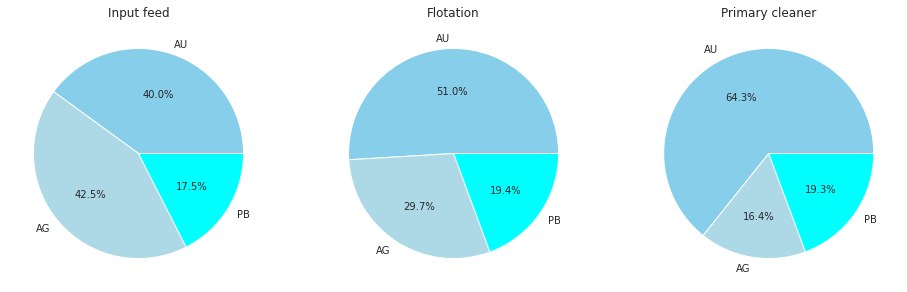

In [17]:
print('\033[4mMedian concentration AU, AG, PB:\033[0m')
#Building a pie chart to understand percentages of concentration for the intested substances
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,8)) #ax1,ax2 refer to your two pies
mycolors = ["skyblue", "lightblue", "cyan"]
labels = ['AU','AG', 'PB']

slices = [grtrain['rougher.input.feed_au'].median(), 
          grtrain['rougher.input.feed_ag'].median(), 
          grtrain['rougher.input.feed_pb'].median()]
ax1.pie(slices, labels=labels, wedgeprops = {'edgecolor': 'white'}, autopct='%1.1f%%', colors = mycolors)
ax1.set_title('Input feed')

slices = [grtrain['rougher.output.concentrate_au'].median(), 
          grtrain['rougher.output.concentrate_ag'].median(), 
          grtrain['rougher.output.concentrate_pb'].median()]
ax2.pie(slices, labels=labels, wedgeprops = {'edgecolor': 'white'}, autopct='%1.1f%%', colors = mycolors)
ax2.set_title('Flotation')

slices = [grtrain['primary_cleaner.output.concentrate_au'].median(), 
          grtrain['primary_cleaner.output.concentrate_ag'].median(),
          grtrain['primary_cleaner.output.concentrate_pb'].median()]
ax3.pie(slices, labels=labels, wedgeprops = {'edgecolor': 'white'}, autopct='%1.1f%%', colors = mycolors)
ax3.set_title('Primary cleaner')

plt.show();

Concentration variation in AU


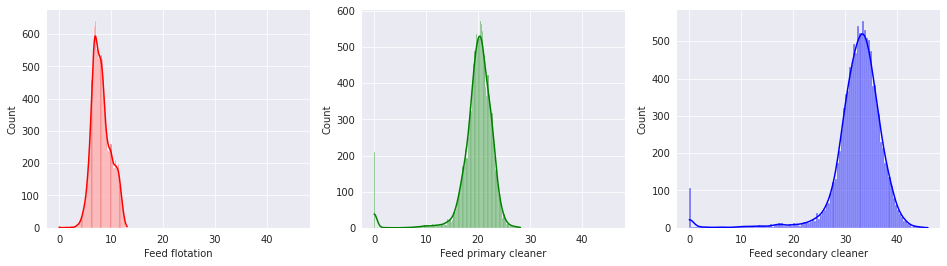

Concentration variation in AG


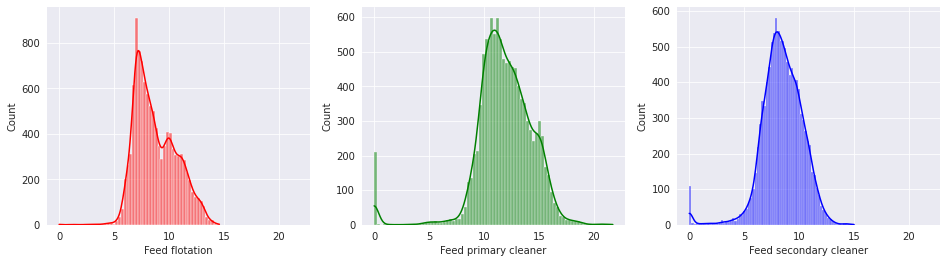

Concentration variation in PB


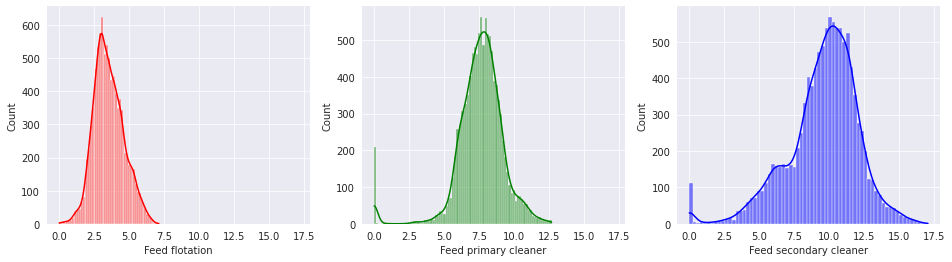

In [18]:
#Creating a distplots of different stages of the same metal.
def metal(feed, flotation, primary):
    f, axes = plt.subplots(1, 3, figsize=(16, 4), sharex=True)
    sns.despine(left=True)
    sns.histplot(feed, kde=True, color="red", ax = axes[0], common_norm = True)
    axes[0].set_xlabel('Feed flotation') 
    sns.histplot(flotation, kde=True, color="green", ax = axes [1], common_norm = True)
    axes[1].set_xlabel('Feed primary cleaner')
    sns.histplot(primary, kde=True, color="blue", ax = axes [2], common_norm = True)
    axes[2].set_xlabel('Feed secondary cleaner')
    plt.show();
    
#Building AU,AG,PB Concentration for each stages distplot
print('Concentration variation in AU')
metal(grtrain['rougher.input.feed_au'],grtrain['rougher.output.concentrate_au'],
      grtrain['primary_cleaner.output.concentrate_au'])

print('Concentration variation in AG')
metal(grtrain['rougher.input.feed_ag'], grtrain['rougher.output.concentrate_ag'],
      grtrain['primary_cleaner.output.concentrate_ag'])

print('Concentration variation in PB')
metal(grtrain['rougher.input.feed_pb'], grtrain['rougher.output.concentrate_pb'],
      grtrain['primary_cleaner.output.concentrate_pb'])

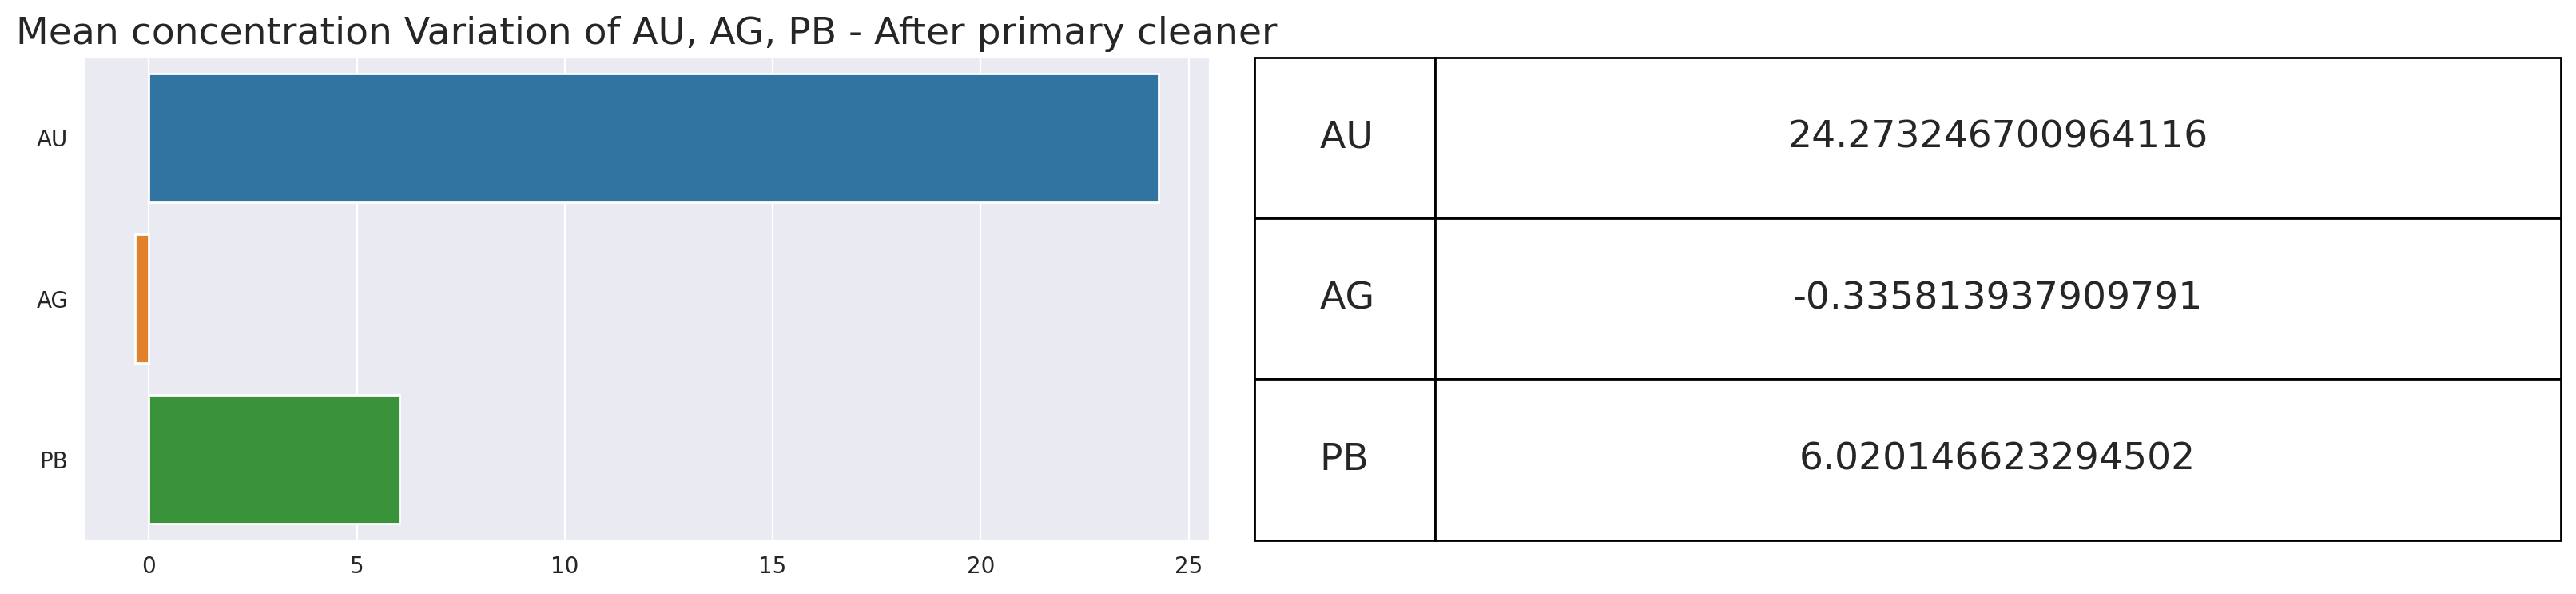

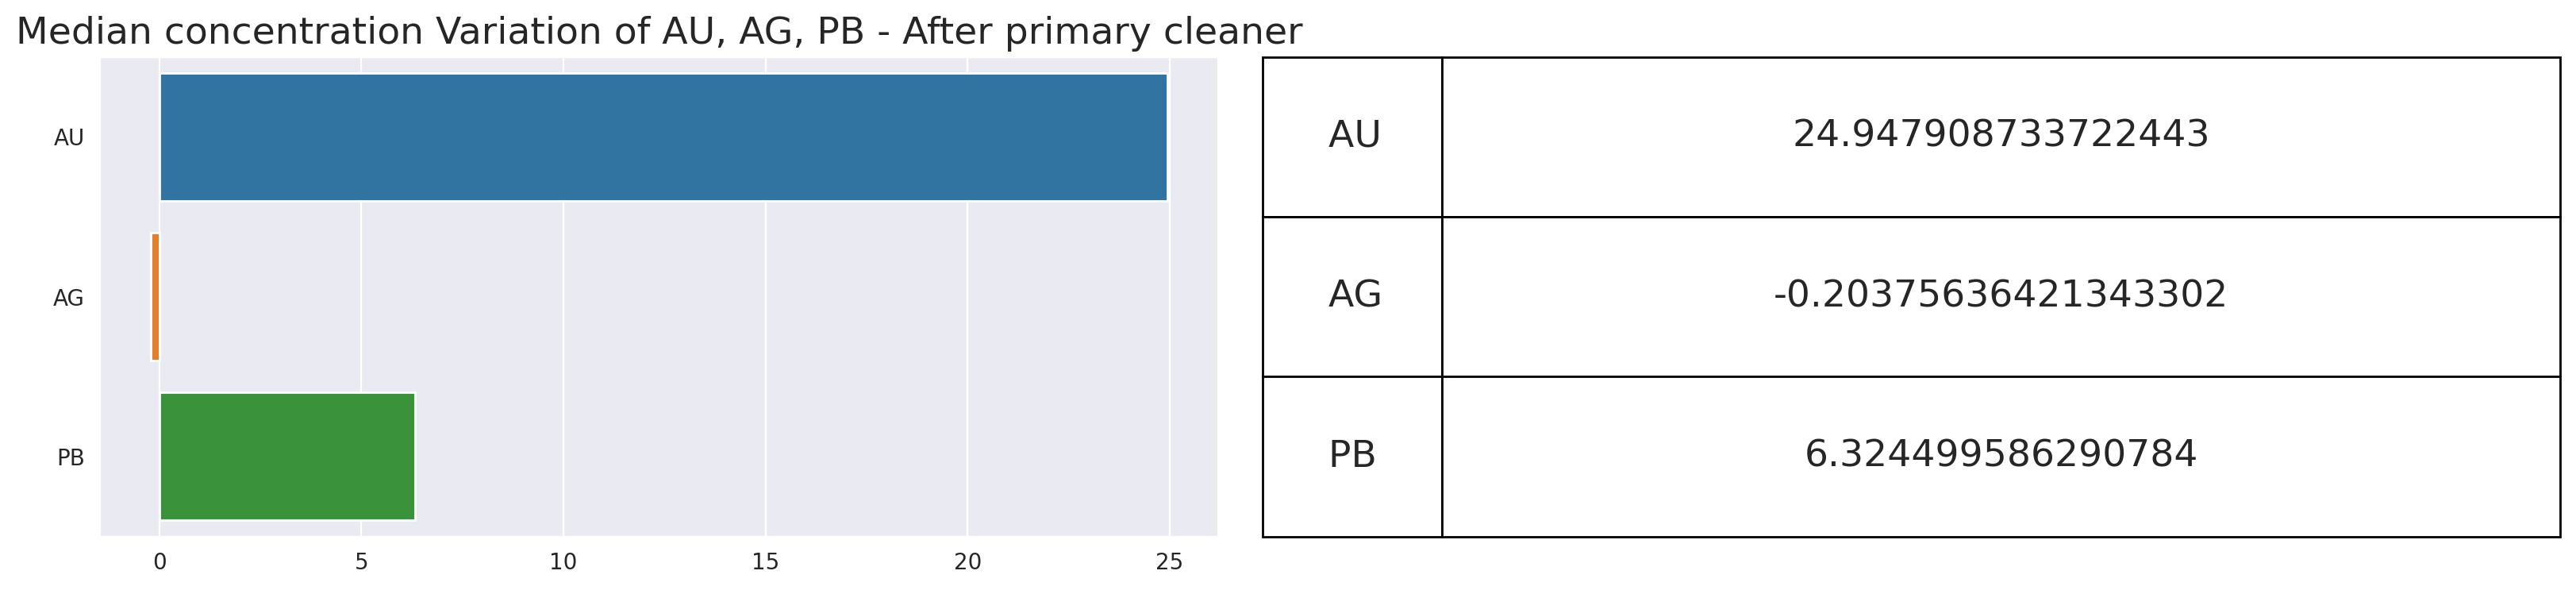

In [19]:
#Measuring the variation among the interest columns.
au_variation = grtrain['primary_cleaner.output.concentrate_au'] - grtrain['rougher.input.feed_au']
ag_variation = grtrain['primary_cleaner.output.concentrate_ag'] - grtrain['rougher.input.feed_ag']
pb_variation = grtrain['primary_cleaner.output.concentrate_pb'] - grtrain['rougher.input.feed_pb']

slicesmean = [au_variation.mean(), ag_variation.mean(), pb_variation.mean()]
slicesmedian = [au_variation.median(), ag_variation.median(), pb_variation.median()]
labels = ['AU','AG','PB']

#plot chart for visualtion mean
fig = plt.figure(figsize=(20,4), dpi=200)
ax = fig.add_subplot(1,2,1)
ax = sns.barplot(x = slicesmean, y= labels)
ax.set_title('Mean concentration Variation of AU, AG, PB - After primary cleaner',fontsize=17)

cell_text = [au_variation.mean()],[ag_variation.mean()],[pb_variation.mean()]
sidetable = ax.table(cellText=cell_text,
         rowLabels=['    AU    ','    AG    ','    PB    '],
         loc='right',
         cellLoc='center',
         bbox=(1.2,0.0,1.0,1.0))
sidetable.set_fontsize(17)

#plot chart for visualtion median
fig = plt.figure(figsize=(20,4), dpi=200)
ax = fig.add_subplot(1,2,1)
ax = sns.barplot(x = slicesmedian, y= labels)
ax.set_title('Median concentration Variation of AU, AG, PB - After primary cleaner',fontsize=17)

cell_text = [au_variation.median()],[ag_variation.median()],[pb_variation.median()]
sidetable = ax.table(cellText=cell_text,
         rowLabels=['    AU    ','    AG    ','    PB    '],
         loc='right',
         cellLoc='center',
         bbox=(1.2,0.0,1.0,1.0))
sidetable.set_fontsize(17)
plt.show();

<hr><h3>B.Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect</h3>

In [20]:
# Defining hist subplot function
def feed_size(feed_train, feed_test):
    plt.figure(figsize=(16, 8))
    sns.despine(left=True)
    sns.histplot(feed_train, kde=True, color="red", common_norm = True)
    sns.histplot(feed_test, kde=True, color="green", common_norm = True)
    plt.show();

Feed size particles in train and test set - Before flotation


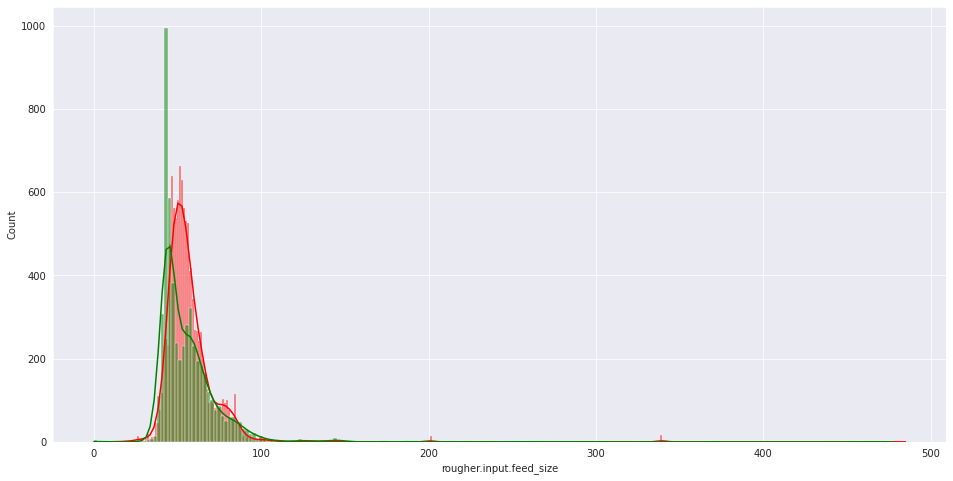

In [21]:
print('Feed size particles in train and test set - Before flotation')
feed_size(grtrain['rougher.input.feed_size'], grtest['rougher.input.feed_size'])    

Feed size particles in train & test set without anomalies - Before flotation


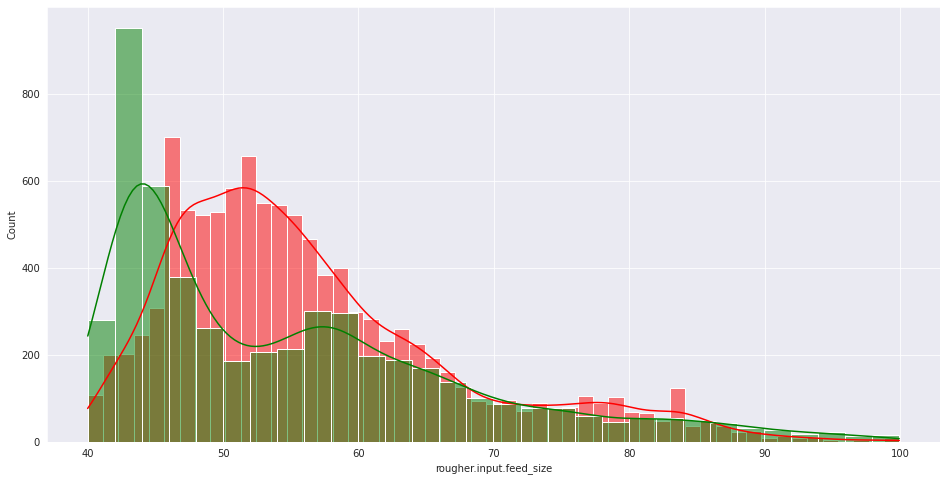

In [22]:
#Eliminating anomalies from training set
grtrain = grtrain.loc[grtrain['rougher.input.feed_size']  > 40]
grtrain = grtrain.loc[grtrain['rougher.input.feed_size']  < 100] 
grtest  = grtest.loc[grtest['rougher.input.feed_size']  > 40] 
grtest  = grtest.loc[grtest['rougher.input.feed_size']  < 100] 

#Comparing feed particle size after flotation stage
print('Feed size particles in train & test set without anomalies - Before flotation')
feed_size(grtrain['rougher.input.feed_size'],grtest['rougher.input.feed_size'])

Feed size particles in train & test set without anomalies - Before flotation - Density


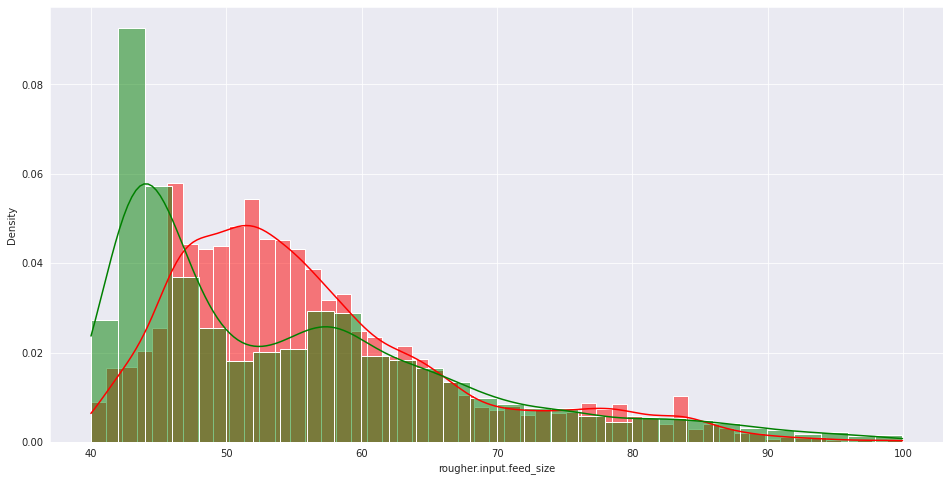

In [23]:
#Train set
#Density hist without outliers
print('Feed size particles in train & test set without anomalies - Before flotation - Density')
plt.figure(figsize=(16, 8))
sns.despine(left=True)
sns.histplot(grtrain['rougher.input.feed_size'], kde=True, color="red", common_norm = True,
             stat='density')
sns.histplot(grtest['rougher.input.feed_size'], kde=True, color="green", common_norm = True,
             stat= 'density')
plt.show();

Feed size particles in train & test set - Before primary cleaner


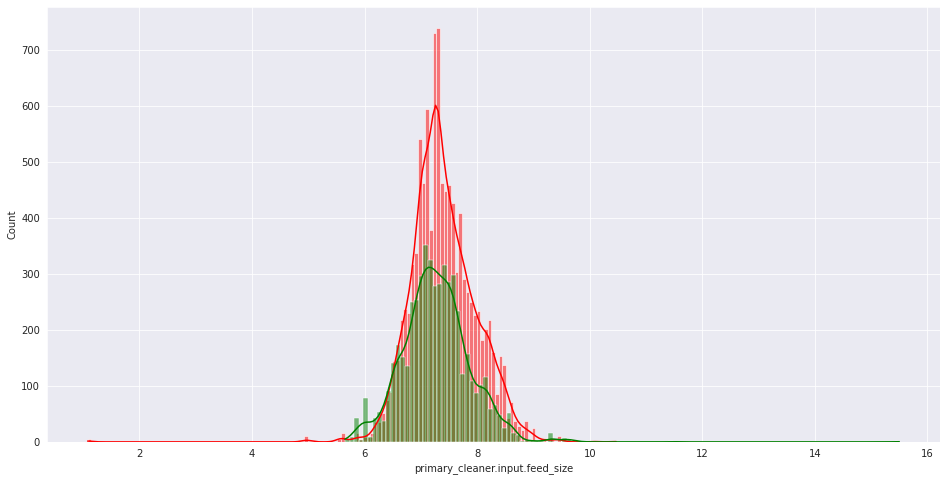

In [24]:
#Comparing feed particle size after the primary cleaner
print('Feed size particles in train & test set - Before primary cleaner')
feed_size(grtrain['primary_cleaner.input.feed_size'], grtest['primary_cleaner.input.feed_size'])

Feed size particles in train & test set without anomalies - Before primary cleaner


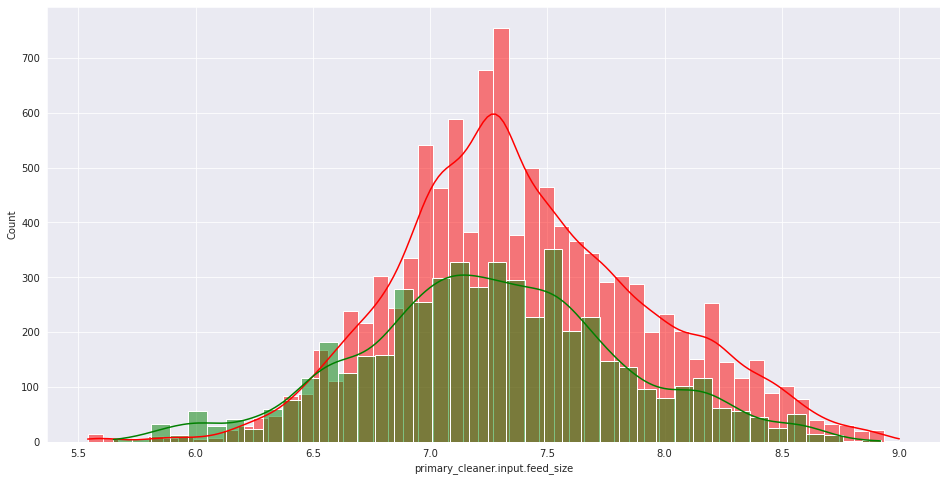

In [25]:
grtrain = grtrain.loc[grtrain['primary_cleaner.input.feed_size'] > 5]
grtrain = grtrain.loc[grtrain['primary_cleaner.input.feed_size'] < 9]
grtest  = grtest.loc[grtest['primary_cleaner.input.feed_size'] > 5]
grtest  = grtest.loc[grtest['primary_cleaner.input.feed_size'] < 9]

#Comparing feed particle size after the primary cleaner
print('Feed size particles in train & test set without anomalies - Before primary cleaner')
feed_size(grtrain['primary_cleaner.input.feed_size'], grtest['primary_cleaner.input.feed_size'])

Feed size particles in train & test set without anomalies. - Before primary cleaner - DENSITY


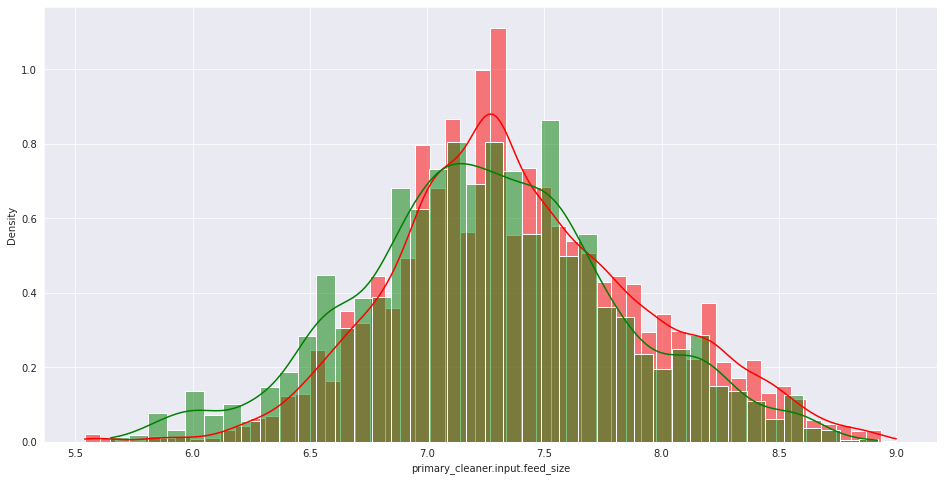

In [26]:
#Test SET
#Density hist without outliers
print('Feed size particles in train & test set without anomalies. - Before primary cleaner - DENSITY')
plt.figure(figsize=(16, 8))
sns.despine(left=True)
sns.histplot(grtrain['primary_cleaner.input.feed_size'], kde=True, color="red", common_norm = True, stat='density')
sns.histplot(grtest['primary_cleaner.input.feed_size'], kde=True, color="green", common_norm = True, stat= 'density')
plt.show();

<hr><h3>C.Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies</h3>

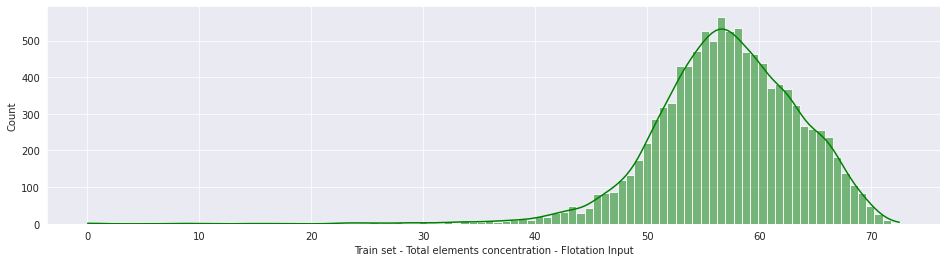

In [27]:
grtrain['rougher.input.feed_total'] = grtrain['rougher.input.feed_au'] + grtrain['rougher.input.feed_ag'] +\
grtrain['rougher.input.feed_pb'] + grtrain['rougher.input.feed_sol']
grtrain['rougher.output.feed_total'] = grtrain['rougher.output.concentrate_au'] +\
grtrain['rougher.output.concentrate_ag'] + grtrain['rougher.output.concentrate_pb'] +\
grtrain['rougher.output.concentrate_sol']
grtrain['primary_cleaner.output.feed_total'] = grtrain['primary_cleaner.output.concentrate_au'] +\
grtrain['primary_cleaner.output.concentrate_ag'] + grtrain['primary_cleaner.output.concentrate_pb'] +\
grtrain['primary_cleaner.output.concentrate_sol']
grtrain['final.output.feed_total'] = grtrain['final.output.concentrate_au'] + grtrain['final.output.concentrate_ag'] +\
grtrain['final.output.concentrate_pb'] + grtrain['final.output.concentrate_sol']

#Train set
#Plotting the total concentration on flotation input
plt.figure(figsize=(16,4))
sns.histplot(grtrain['rougher.input.feed_total'], kde=True, color='green')
plt.xlabel('Train set - Total elements concentration - Flotation Input')
plt.show();

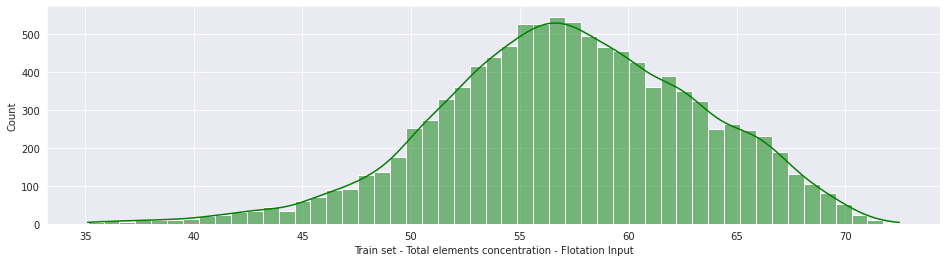

In [28]:
#Eliminating anomalies before flotation in test dataset
grtrain= grtrain.loc[grtrain['rougher.input.feed_total'] > 35]

#figure without outliers
plt.figure(figsize=(16,4))
sns.histplot(grtrain['rougher.input.feed_total'], kde=True, color='green')
plt.xlabel('Train set - Total elements concentration - Flotation Input')
plt.show();

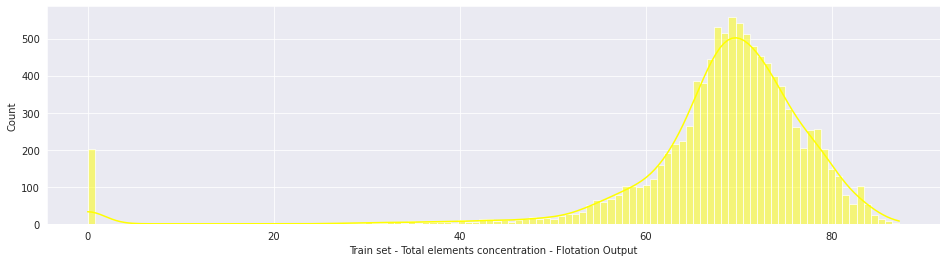

In [29]:
#Train set
#Plotting the total concentration on floatation output
plt.figure(figsize=(16,4))
sns.histplot(grtrain['rougher.output.feed_total'], kde=True, color='yellow')
plt.xlabel('Train set - Total elements concentration - Flotation Output')
plt.show();

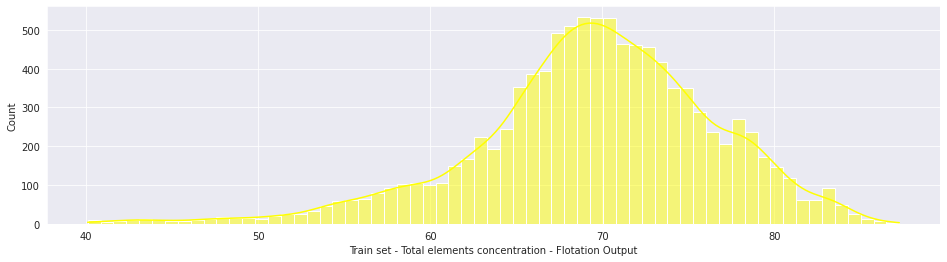

In [30]:
#Eliminating anomalies after flotation
grtrain = grtrain.loc[grtrain['rougher.output.feed_total'] > 40]

#figure without outliers
plt.figure(figsize=(16,4))
sns.histplot(grtrain['rougher.output.feed_total'], kde=True, color='yellow')
plt.xlabel('Train set - Total elements concentration - Flotation Output')
plt.show();

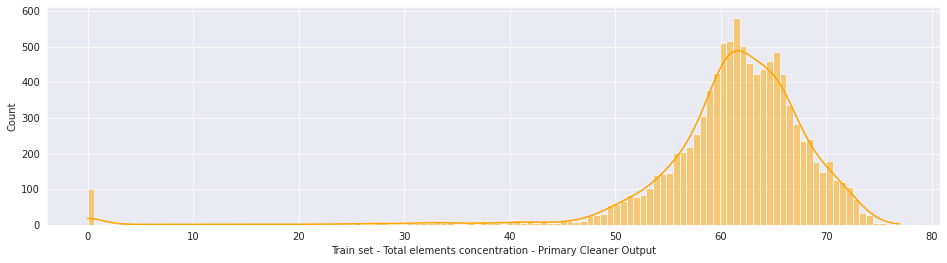

In [31]:
#Train set
#Plotting the total concentration on primary cleaner
plt.figure(figsize=(16,4))
sns.histplot(grtrain['primary_cleaner.output.feed_total'], kde=True, color='orange')
plt.xlabel('Train set - Total elements concentration - Primary Cleaner Output')
plt.show();

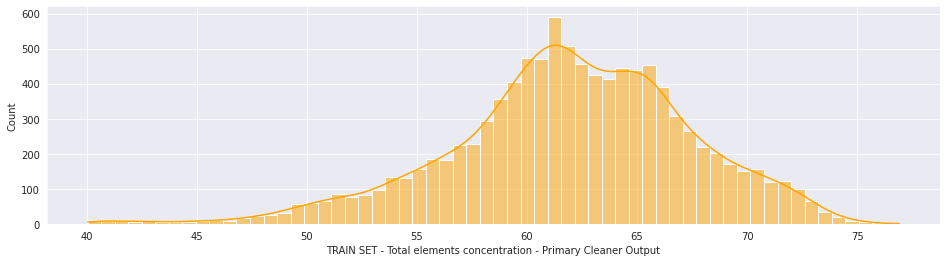

In [32]:
#Eliminating anomalies after primary cleaner
grtrain = grtrain.loc[grtrain['primary_cleaner.output.feed_total']  > 40]

#Same figure without outliers
plt.figure(figsize=(16,4))
sns.histplot(grtrain['primary_cleaner.output.feed_total'], 
             kde=True, color='orange')
plt.xlabel('TRAIN SET - Total elements concentration - Primary Cleaner Output')
plt.show();

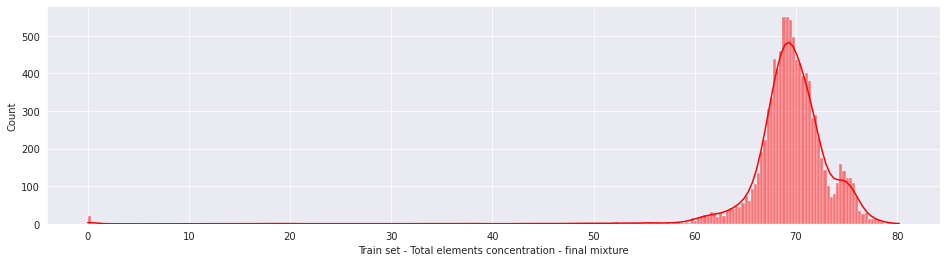

In [33]:
#Train set
#Plotting the total concentration on primary cleaner
plt.figure(figsize=(16,4))
sns.histplot(grtrain['final.output.feed_total'], kde=True, color='red')
plt.xlabel('Train set - Total elements concentration - final mixture')
plt.show();

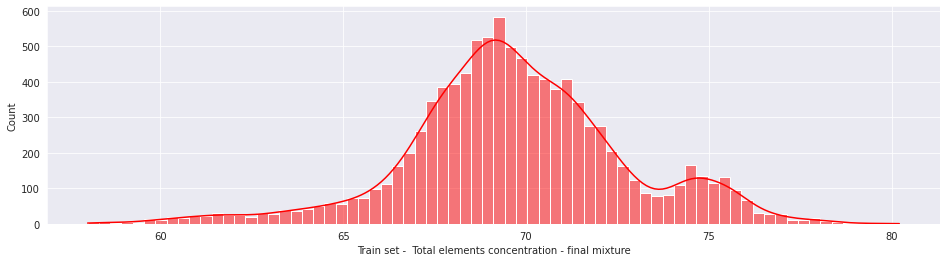

In [34]:
#Eliminating anomalies after secondary cleaner
grtrain =grtrain.loc[grtrain['final.output.feed_total']  > 58]

#figure without outliers
plt.figure(figsize=(16,4))
sns.histplot(grtrain['final.output.feed_total'], kde=True, color='red')
plt.xlabel('Train set -  Total elements concentration - final mixture')
plt.show();

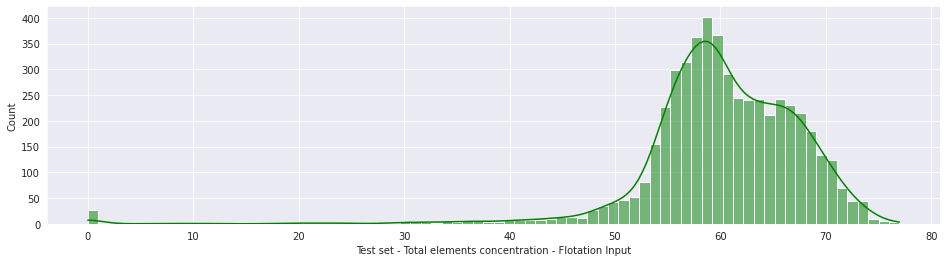

In [35]:
grtest['rougher.input.feed_total'] = grtest['rougher.input.feed_au'] + grtest['rougher.input.feed_ag'] +\
grtest['rougher.input.feed_pb'] + grtest['rougher.input.feed_sol']

#Test set
#Plotting the total concentration on flotation input
plt.figure(figsize=(16,4))
sns.histplot(grtest['rougher.input.feed_total'], kde=True, color='green')
plt.xlabel('Test set - Total elements concentration - Flotation Input')
plt.show();

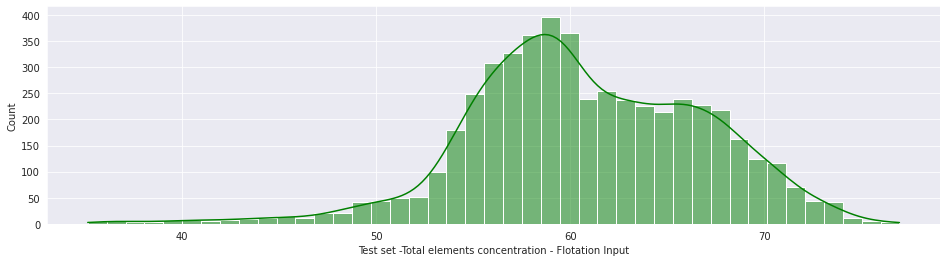

train shape: (9877, 91)
test shape: (5041, 54)


In [36]:
#Eliminating anomalies before flotation in test dataset
grtest = grtest.loc[grtest['rougher.input.feed_total'] > 35]

#figure without anomalies
plt.figure(figsize=(16,4))
sns.histplot(grtest['rougher.input.feed_total'], kde=True, color='green')
plt.xlabel('Test set -Total elements concentration - Flotation Input')
plt.show();

print("train shape:",grtrain.shape)
print("test shape:",grtest.shape)

<hr><h2>Step II - Conclusion</h2>

<b>A.Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage</b>

Switch to EDA , we take a note to understand the the concentration of metals change during differents purification and take note of the variation of substances.

We want to highlight and show the % of composition of ore in two different stages , considering only 3 metals. As we can see the Gold ore mixture has % of :

Mean:
- AU 39.7%(8.11), AG 42.9%(8.78) & PB 17.4%(3.56)   - Before flotation
- AU 50.4%(20.26), AG 30.2%(11.84) & PB 19.4%(7.61) - After flotation
- AU 64.3%(32.38), AG 16.7%(8.43) & PB 19.0%(9.57)  - After primary cleaner

Median:
- AU 40%(7.86), AG 42.5%(8.37) & PB 17.5%(3.45)    - Before flotation
- AU 51%(20.26), AG 29.7%(11.80) & PB 19.4%(7.70)  - After flotation
- AU 64.3%(33.01), AG 16.4%(8.43) & PB 19.3%(9.91) - After primary cleaner

We countine to plot the displot that show the concentrations of different metals in different stages

- Red feed flotation 

- Green primary cleaner

- Blue feed secondary cleaner

Our first displot show the AU concentrations at differents stages, during the feed of floatation AU range among 4 & 12 , as for the primary cleaner the range in 8 & 26 and secondary cleaner 12 & 42 

second displot show the AG concentrations at differents stages, during the feed of floatation AG range among 4 & 15 , as for the primary cleaner the range in 4 & 19 and secondary cleaner 4 & 15 

and third displot show the PB concentrations at differents stages, during the feed of floatation PB range among 0 & 7.5 , as for the primary cleaner the range in 2.5 & 12.5 and secondary cleaner 0 & 17.5 

In this step we also want to clac and visualize the total varation of substances start from begin of the mixture through the end and we found that:

<b><u>Mean is :</u></b>

- AU 24.27 in all three stages , definitely a strong increase concentration of this element

- AG -0.33  in all three stages, slight descrease of concentration of this element

- PB 6.02  in all three stages, slight increase of concentration of this element

<b><u>Median is :</u></b>

- AU 24.9 in all three stages , definitely a strong increase concentration of this element

- AG -0.20  in all three stages, slight descrease of concentration of this element

- PB 6.32  in all three stages, slight increase of concentration of this element

This show that AU is increase substantially, PB incrade as well , when AG remain statical with a really slight decrease of concentration

<hr>

<b>B.Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect</b>

<u>Feed size particles in train and test dataset Before floation stage</u>

We would like to understand if the feed particle size been change significantly among the two datasets(train & test)

in our first histogram chart we can see that our feed size in "Train" set (color Red) and "Test" set (color Green), distribution is similar with major peak in the range of 40 - 50 units in both samples

Concerning our first chart we can't add any further info since the outliers skew the results that show us , When we eliminate them (<40 & <100) our flotation stage input show a big peak in the range of 45-50 in the "Train" set and around 50 in the "Test" set bulid a density chart confirm it , so we can say there distribution now looks similar

<u>Feed size particles in train and test dataset Before primary cleaner stage</u> 

Our two histograms with kde figures , shape is really similar since both of them count value is among 6 and 9 wheil height differs , this is normal, since the "Train" set count more records. in fact when we eliminatethe anomalies with size inferior to 5 & superior to 9 , Our count chart shape is very similar , looking at the density of the same one. So we have equal figures.

<hr>

<b>Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies</b>

Develop this point , to answer our question , we decied to create columns to store the total concentration of substances in different stages , help us to understand well those graphs so we split it to:

- Green,  flotation feed

- Yellow,  primary cleaner feed

- Orange,  secondary cleaner feed

- Red,   Our final mixture

<u>Train set:</u>

- Concentrations of AU + AG + PB + SOL as flotation input

the chart show majority of values are counted among 35 and 70 , for this reason we decied to eliminate every values lower then 36.

- Concentrations of AU + AG + PB + SOL after flotation 

the chart show majority of values are counted among 40 and 85 , for this reason we decied to eliminate every values lower then 41.

- Concentrations of AU + AG + PB + SOL after primary cleaner

the chart show majority of values are counted among 40 and 75 , for this reason we decied to eliminate every values lower then 41.

- Concentrations of AU + AG + PB + SOL after secondary cleaner  our Final mixture

the chart show majority of values are counted among 60 and 80 , for this reason we decied to eliminate every values lower then 57.

<u>Test set:</u>

- Concentrations of AU + AG + PB + SOL as flotation input

the chart show majority of values are counted among 30 and 80 , for this reason we decied to eliminate every values lower then 36.

<u>Result:</u>

train shape: (9877, 91) 

test shape: (5041, 54)

 <hr><div id="Step III"><h2>Step III - Build the model</h2><br></div>

<a href="#index"><button style=" background-color: #04AA6D; border: none; color: white; padding: 10px; text-align: center; text-decoration: none; display: inline-block; font-size: 12px; margin: 3px 2px; border-radius: 12px; font-weight: bold;"> Return to index menu</button></a>

<hr><h3>A.Write a function to calculate the final sMAPE value</h3>

In [37]:
#Defining function of Symmetric Mae 
def smape_calc(target, predictions):
    denominator = (np.abs(target) + np.abs(predictions))
    diff = np.abs(target - predictions) / denominator
    diff[denominator == 0] = 0.0 #avoiding inf values
    return 200 * np.mean(diff)  

#Final Symmetric Mae 
def fin_smape(smape_1, smape_2):
    f_smape = (smape_1 * 25 / 100) + (smape_2 * 75 / 100)
    f_smape = abs(f_smape)
    print('Final SMAPE score is equal to:', f_smape.round(3), '%')
    return f_smape

<hr><h3>B.Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample</h3>


<hr><b>Creating and assigning features and target variables for both DataFrames</b>

In [38]:
#Train data 
#Removing unecessary columns to build the model for the testing set
grtrain = grtrain.drop(['primary_cleaner.output.concentrate_sol', 'final.output.tail_pb', 'secondary_cleaner.output.tail_pb',
                        'primary_cleaner.output.tail_pb', 'final.output.tail_sol','final.output.concentrate_sol'],axis=1)
grtrain = grtrain.drop([ 'secondary_cleaner.output.tail_sol','primary_cleaner.output.concentrate_ag',
                        'rougher.output.tail_pb','rougher.output.concentrate_pb', 'final.output.tail_ag', 
                        'primary_cleaner.output.tail_au','secondary_cleaner.output.tail_au'], axis=1)
grtrain = grtrain.drop(['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au',
                        'rougher.calculation.sulfate_to_au_concentrate', 'secondary_cleaner.output.tail_ag',
                        'primary_cleaner.output.tail_ag', 'rougher.output.tail_sol'], axis=1)
grtrain = grtrain.drop(['final.output.tail_au', 'rougher.output.concentrate_sol', 'primary_cleaner.output.concentrate_pb',
                              'primary_cleaner.output.tail_sol', 'final.output.concentrate_ag', 'rougher.output.tail_ag', 
                              'rougher.calculation.floatbank10_sulfate_to_au_feed'], axis=1)
grtrain = grtrain.drop(['final.output.concentrate_au','rougher.output.tail_au', 'rougher.output.concentrate_ag', 
                        'final.output.concentrate_pb','rougher.calculation.au_pb_ratio',
                        'rougher.calculation.floatbank11_sulfate_to_au_feed'], axis=1)
grtrain = grtrain.drop(['rougher.output.feed_total', 'primary_cleaner.output.feed_total','final.output.feed_total'], axis =1)

In [39]:
#Test data 
#Assigning to temporany DataFrame a target column from gold_full df to merget it with gold_test
df_target = pd.DataFrame()
df_target['rougher.output.recovery'] = grfull['rougher.output.recovery']
df_target['date'] = grfull['date']
df_target['final.output.recovery'] = grfull['final.output.recovery']
display(df_target)

,rougher.output.recovery,date,final.output.recovery
0,87.107763,2016-01-15 00:00:00,70.541216
1,86.843261,2016-01-15 01:00:00,69.266198
2,86.842308,2016-01-15 02:00:00,68.116445
3,87.226430,2016-01-15 03:00:00,68.347543
4,86.688794,2016-01-15 04:00:00,66.927016
...,...,...,...
22711,89.574376,2018-08-18 06:59:59,73.755150
22712,87.724007,2018-08-18 07:59:59,69.049291
22713,88.890579,2018-08-18 08:59:59,67.002189
22714,89.858126,2018-08-18 09:59:59,65.523246


In [40]:
#Test data 
#Merging gold_test and df_target on date column
grtest = grtest.merge(df_target, on ='date', how='inner')

#Dropping NaN values obtained in the target column
grtest = grtest.dropna()

#Defining features and target for Train data 
train_features = grtrain.drop(['rougher.output.recovery','date', 'final.output.recovery'], axis=1)
train_target_rougher = grtrain['rougher.output.recovery']
train_target_final = grtrain['final.output.recovery']

#Defining features and target for Test data 
test_features = grtest.drop(['rougher.output.recovery','date', 'final.output.recovery'], axis=1)
test_target_rougher = grtest['rougher.output.recovery']
test_target_final = grtest['final.output.recovery']

<hr><b>Cross validating the models</b>

In [41]:
#Creating pipelines
pipe_dtr = Pipeline([('scaler0', StandardScaler()),
                    ('DecisionTreeRegressor', DecisionTreeRegressor())])
pipe_rfr = Pipeline([('scaler1', StandardScaler()),
                    ('Random Forest Regressor', RandomForestRegressor())])
pipe_linear = Pipeline([('scaler2', StandardScaler()),
                       ('Linear Regression', LinearRegression())])

#Creating list of pipelines.
pipelines = [pipe_dtr, pipe_rfr, pipe_linear]
#Creating a dictionary of pipelines.
pipe_dict = {pipe_dtr: 'DecisionTreeRegressor', pipe_rfr:'Random Forest Regressor', pipe_linear:'Linear Regression'}

#Creating an smape scoring variable to pass it to cross validation functions.
smape = make_scorer(smape_calc, greater_is_better = False)
#Looping trough pipelines to obtain cross validation results.

for pipe in pipelines:
    print(pipe_dict[pipe])
    print(cross_val_score(pipe, train_features, train_target_rougher, scoring=smape, cv=5))
    sommatory_rougher_smape = (abs(np.sum(cross_val_score(pipe, train_features, train_target_rougher, scoring=smape, cv=5))))
    rougher_smape_cv = sommatory_rougher_smape / 5
    print('Rougher SMAPE:', rougher_smape_cv)
    print(cross_val_score(pipe, train_features, train_target_final, scoring=smape, cv=5))
    sommatory_final_smape = (abs(np.sum(cross_val_score(pipe, train_features, train_target_final, scoring=smape, cv=5))))
    secondary_smape_cv = sommatory_final_smape / 5
    print('Secondary SMAPE:', secondary_smape_cv)
    fin_smape(rougher_smape_cv, secondary_smape_cv)
    print()

DecisionTreeRegressor
[ -8.39863858 -10.50583334  -5.08509227 -12.13061741  -6.71138128]
Rougher SMAPE: 8.226560144826504
[-14.39878583 -15.73462106 -12.42332114 -14.32121996 -15.23832113]
Secondary SMAPE: 14.611775235616824
Final SMAPE score is equal to: 13.015 %

Random Forest Regressor
[-6.62421504 -5.55835903 -3.89816652 -7.52368375 -6.89239665]
Rougher SMAPE: 6.172153116276808
[ -8.56481605 -10.81945047  -7.52555405 -10.82197539  -9.27701302]
Secondary SMAPE: 9.273046599771174
Final SMAPE score is equal to: 8.498 %

Linear Regression
[-6.66576493 -5.94011037 -3.98692303 -5.1745756  -9.49441765]
Rougher SMAPE: 6.252358317101587
[-10.32542944  -8.50724567  -6.92658175  -8.46151677 -11.8702229 ]
Secondary SMAPE: 9.218199306234787
Final SMAPE score is equal to: 8.477 %



In [42]:
#TUNING RANDOM FOREST REGRESSOR MODEL PARAMETERS

#Creating a dictionary to pass it to Cross Validation as scoring variable.
smape = {'SMAPE':make_scorer(smape_calc, greater_is_better = False)}

#Creating a parameters dictionary for possible hyperparameters values (DecisionTreeRegressor)
parameters = {'n_estimators': (50, 100, 110, 120, 150, 175,190, 200, 220),'max_depth': (15,18,20,23)} 

#Making out a grid for CV tuning parameters from parameter Grid and SMAPE as score.
RFR_grid = GridSearchCV(RandomForestRegressor(random_state=0),scoring=smape,refit='SMAPE',cv=5,param_grid=parameters)

#Creating the model for target_rougher
RFR_grid_model = RFR_grid.fit(train_features, train_target_rougher)

#Printing top values.
print(RFR_grid_model.best_estimator_)
rougher_smape = RFR_grid_model.best_score_
print('Rougher smape', rougher_smape)

#Creating the model for target_final
RFR_grid_model1 = RFR_grid.fit(train_features, train_target_final)

#Printing top values.
print(RFR_grid_model1.best_estimator_)
secondary_smape =RFR_grid_model1.best_score_
print('Secondary smape', secondary_smape)

fin_smape(rougher_smape, secondary_smape)
print('Random Forest Regressor')

RandomForestRegressor(max_depth=18, n_estimators=220, random_state=0)
Rougher smape -6.021845721235428
RandomForestRegressor(max_depth=18, n_estimators=50, random_state=0)
Secondary smape -9.25574805388173
Final SMAPE score is equal to: 8.447 %
Random Forest Regressor


<hr><b>Testing the models</b>

In [43]:
#TESTING LINEAR REGRESSION MODEL

linear_model = LinearRegression()

#Rougher calculations
pipe_linear.fit(train_features, train_target_rougher)
linear_predictions_rougher = pipe_linear.predict(test_features)

smape_test_rougher_linear = smape_calc(test_target_rougher, linear_predictions_rougher)
print('Rougher SMAPE', smape_test_rougher_linear.round(3),'%')

#Secondary calculations
linear_model.fit(train_features, train_target_final)
linear_predictions_secondary = linear_model.predict(test_features)
smape_test_secondary_linear = smape_calc(test_target_final, linear_predictions_secondary)
print('Secondary SMAPE', smape_test_secondary_linear.round(3),'%')

#Final SMAPE calculation.
fin_smape(smape_test_rougher_linear, smape_test_secondary_linear)
print('Test on Linear Regression')

Rougher SMAPE 8.372 %
Secondary SMAPE 8.581 %
Final SMAPE score is equal to: 8.529 %
Test on Linear Regression


In [44]:
#TESTING RANDOM FOREST REGRESSOR MODEL

rfr_model = RandomForestRegressor(random_state = 0, n_estimators=100, max_depth=20, criterion='mae')

#Rougher calculations
pipe_rfr.fit(train_features, train_target_rougher)
rfr_predictions_rougher = pipe_rfr.predict(test_features)

smape_test_rougher_rfr = smape_calc(test_target_rougher, rfr_predictions_rougher)
print('Rougher SMAPE', smape_test_rougher_rfr.round(3),'%')

#Secondary calculations
rfr_model.fit(train_features, train_target_final)
rfr_predictions_secondary = rfr_model.predict(test_features)
smape_test_secondary_rfr = smape_calc(test_target_final, rfr_predictions_secondary)
print('Secondary SMAPE', smape_test_secondary_rfr.round(3),'%')

#Final SMAPE calculation.
fin_smape(smape_test_rougher_rfr, smape_test_secondary_rfr)
print('Test on Random Forest Regressor')

Rougher SMAPE 8.726 %
Secondary SMAPE 9.016 %
Final SMAPE score is equal to: 8.944 %
Test on Random Forest Regressor


<hr><b>Sanity checking the test result</b>

In [45]:
#Sanity check

#Creating a DummyRegressor model
dummy = DummyRegressor()

#Rougher calculations
dummy.fit(train_features, train_target_rougher)
dummy_predictions_rougher = dummy.predict(test_features)

smape_test_rougher_dummy = smape_calc(test_target_rougher, dummy_predictions_rougher)
print('Rougher SMAPE', smape_test_rougher_dummy.round(3),'%')

#Secondary calculations
dummy.fit(test_features, test_target_final)
dummy_predictions_secondary = dummy.predict(test_features)
smape_test_secondary_dummy = smape_calc(test_target_final, dummy_predictions_secondary)
print('Secondary SMAPE', smape_test_secondary_dummy.round(3),'%')

#Final SMAPE calculation.
fin_smape(smape_test_rougher_dummy, smape_test_secondary_dummy)
print("Dummy's evaluation")

Rougher SMAPE 8.968 %
Secondary SMAPE 8.4 %
Final SMAPE score is equal to: 8.542 %
Dummy's evaluation


<hr><h2>Step III - Conclusion</h2>

<b>A.Write a function to calculate the final sMAPE value</b>

We wrote a fucntion for sMape value and final sMape, using the formulas below:
![SMAPE CALCULATION](https://pictures.s3.yandex.net/resources/smape_1576239058_1589899769.jpg)

![SMAPE FINAL](https://pictures.s3.yandex.net/resources/_smape_1_1589900649.jpg)


<b>A.Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings</b>

We start by create a target var for the 'Test' data set merage it from the full dataset, Define the features and targets for both datasets

for our cross validation I we decied to work with piplines, For that we create a pipeline for each of our intersted models

we loop and than pass all the models a cross the validation function to obtain after the mean values for each one of the models.

- Decision Tree Regressor :
Final SMAPE = 13.015%


- Random Forest Regressor:
Final SMAPE = 8.498%


- Linear Regression:
Final SMAPE = 8.477 %

Than we decied to tune hypeparameters only for the 'Random Forest Regressor' model find in 100 estimators and Max dep of 20 of the best result values and pass it to test the model on the testing dataset 



- Linear Regression:\
Rougher SMAPE = 8.372 %\
Secondary SMAPE = 8.581 %\
Final SMAPE = 8.529 %


- Random Forest Regressor:\
Rougher SMAPE = 8.726 %
Secondary SMAPE = 9.016 %
Final SMAPE = 8.944 %


- Dummy Regressor (Sanity check):\
Rougher SMAPE = 8.968 %\
Secondary SMAPE = 8.4 %\
Final SMAPE = 8.542 %


After all our testing we see that the model with the best score is "LinearRegression" with 8.529% , which is better than our dummy best score 8.542 %

<hr><div id="general_conclusion"><h2>General conclusion:</h2></div>  

<a href="#index"><button style=" background-color: #04AA6D; border: none; color: white; padding: 10px; text-align: center; text-decoration: none; display: inline-block; font-size: 12px; margin: 3px 2px; border-radius: 12px; font-weight: bold;"> Return to index menu</button></a>

<b><u>INTRODUCTION</u></b>

Prepare a prototype of a machine learning model for Zyfra. The company develops efficiency solutions for heavy industry

- Predict the amount of gold recovered from gold ore , You have the data on extraction and purification

- Model that will help to optimize the production and eliminate unprofitable parameters

<hr><b style="font-size: 14px;">Three gold recovery data sets:</b>

"gold_recovery_train" we call "grtrain" : 16860 rows and 87 columns

"gold_recovery_test" we call "grtest" : 5856 rows and 53 columns

"gold_recovery_full" we call "grfull" : 22715 rows and 87 columns

<b><u>Missing Values:</u></b>

Since our dataset 'Train' and 'Test' split from the full dataset, they contain missing values compare to the full dataset

<b><u>Duplicated:</u></b>

Doesn't contain any duplicates

<hr>
<h2>Step I</h2>

What we found so far :

We have 3 datasets : 

- "gold train" we call "grtrain" : 16860 rows and 87 columns

- "gold test" we call "grtest" : 5856 rows and 53 columns

- "gold full" we call "grfull" : 22715 rows and 87 columns

which already split from the full dataset , Merage the train and test datasets we get the full one , we found that Test missing out a calc of 34 columns.

<hr>

<b>B. Check that recovery is calculated correctly. Using the training set, calculate recovery for the rougher.output.recovery feature. Find the MAE between your calculations and the feature values</b>

As we see there is need to understand if the recovery column provide by features values in our processes is calc correctly or not. to do it we need to get rid of our missing values (AKA :NaNs) that show in this column our current target. after that we can define a function to calc this column with: 

![Recovery formula](https://pictures.s3.yandex.net/resources/Recovery_1576238822_1589899219.jpg)

And save the array result from the recovery function to compere it to ['rougher.output.recovery'] column , our result of this compression with the help of MAE (AKA : mean absolute error function): 9.303415616264301e-15.

We can see clearly that the value of the two array to my calc and column is almost identical

<hr>
<b>C. Analyze the features not available in the test set. What are these parameters? What is their type?</b>

Our different numbers of row in the two dataset, derive from the fact that our full dataset we split and for this reason the most important different among the two is the number of columns. in our test dataset there is 34 missing columns and we need to identify there dtype to find it we use the line code :"set(grtrain.columns).symmetric_difference(grtest.columns" , we can see all of the our float type and most of them represent output and calc value.

<hr>
<b>D.Perform data preprocessing</b><br>
to keep our data pre process we decied to drop all the missing values (NaNs) from our dataset test and train so the final shape we got is 

Shape:
- Train: (11017, 87) 
- Test: (5383, 53)



<hr><h2>Step II</h2>

<b>A.Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage</b>

Switch to EDA , we take a note to understand the the concentration of metals change during differents purification and take note of the variation of substances.

We want to highlight and show the % of composition of ore in two different stages , considering only 3 metals. As we can see the Gold ore mixture has % of :

Mean:
- AU 39.7%(8.11), AG 42.9%(8.78) & PB 17.4%(3.56)   - Before flotation
- AU 50.4%(20.26), AG 30.2%(11.84) & PB 19.4%(7.61) - After flotation
- AU 64.3%(32.38), AG 16.7%(8.43) & PB 19.0%(9.57)  - After primary cleaner

Median:
- AU 40%(7.86), AG 42.5%(8.37) & PB 17.5%(3.45)    - Before flotation
- AU 51%(20.26), AG 29.7%(11.80) & PB 19.4%(7.70)  - After flotation
- AU 64.3%(33.01), AG 16.4%(8.43) & PB 19.3%(9.91) - After primary cleaner

We countine to plot the displot that show the concentrations of different metals in different stages

- Red feed flotation 

- Green primary cleaner

- Blue feed secondary cleaner

Our first displot show the AU concentrations at differents stages, during the feed of floatation AU range among 4 & 12 , as for the primary cleaner the range in 8 & 26 and secondary cleaner 12 & 42 

second displot show the AG concentrations at differents stages, during the feed of floatation AG range among 4 & 15 , as for the primary cleaner the range in 4 & 19 and secondary cleaner 4 & 15 

and third displot show the PB concentrations at differents stages, during the feed of floatation PB range among 0 & 7.5 , as for the primary cleaner the range in 2.5 & 12.5 and secondary cleaner 0 & 17.5 

In this step we also want to clac and visualize the total varation of substances start from begin of the mixture through the end and we found that:

<b><u>Mean is :</u></b>

- AU 24.27 in all three stages , definitely a strong increase concentration of this element

- AG -0.33  in all three stages, slight descrease of concentration of this element

- PB 6.02  in all three stages, slight increase of concentration of this element

<b><u>Median is :</u></b>

- AU 24.9 in all three stages , definitely a strong increase concentration of this element

- AG -0.20  in all three stages, slight descrease of concentration of this element

- PB 6.32  in all three stages, slight increase of concentration of this element

This show that AU is increase substantially, PB incrade as well , when AG remain statical with a really slight decrease of concentration

<hr>

<b>B.Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect</b>

<u>Feed size particles in train and test dataset Before floation stage</u>

We would like to understand if the feed particle size been change significantly among the two datasets(train & test)

in our first histogram chart we can see that our feed size in "Train" set (color Red) and "Test" set (color Green), distribution is similar with major peak in the range of 40 - 50 units in both samples

Concerning our first chart we can't add any further info since the outliers skew the results that show us , When we eliminate them (<40 & <100) our flotation stage input show a big peak in the range of 45-50 in the "Train" set and around 50 in the "Test" set bulid a density chart confirm it , so we can say there distribution now looks similar

<u>Feed size particles in train and test dataset Before primary cleaner stage</u> 

Our two histograms with kde figures , shape is really similar since both of them count value is among 6 and 9 wheil height differs , this is normal, since the "Train" set count more records. in fact when we eliminatethe anomalies with size inferior to 5 & superior to 9 , Our count chart shape is very similar , looking at the density of the same one. So we have equal figures.

<hr>

<b>Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies</b>

Develop this point , to answer our question , we decied to create columns to store the total concentration of substances in different stages , help us to understand well those graphs so we split it to:

- Green,  flotation feed

- Yellow,  primary cleaner feed

- Orange,  secondary cleaner feed

- Red,   Our final mixture

<u>Train set:</u>

- Concentrations of AU + AG + PB + SOL as flotation input

the chart show majority of values are counted among 35 and 70 , for this reason we decied to eliminate every values lower then 36.

- Concentrations of AU + AG + PB + SOL after flotation 

the chart show majority of values are counted among 40 and 85 , for this reason we decied to eliminate every values lower then 41.

- Concentrations of AU + AG + PB + SOL after primary cleaner

the chart show majority of values are counted among 40 and 75 , for this reason we decied to eliminate every values lower then 41.

- Concentrations of AU + AG + PB + SOL after secondary cleaner  our Final mixture

the chart show majority of values are counted among 60 and 80 , for this reason we decied to eliminate every values lower then 57.

<u>Test set:</u>

- Concentrations of AU + AG + PB + SOL as flotation input

the chart show majority of values are counted among 30 and 80 , for this reason we decied to eliminate every values lower then 36.

<u>Result:</u>

train shape: (9877, 91) 

test shape: (5041, 54)


<hr><h2>Step III</h2>

<b>A.Write a function to calculate the final sMAPE value</b>

We wrote a fucntion for sMape value and final sMape, using the formulas below:
![SMAPE CALCULATION](https://pictures.s3.yandex.net/resources/smape_1576239058_1589899769.jpg)

![SMAPE FINAL](https://pictures.s3.yandex.net/resources/_smape_1_1589900649.jpg)


<b>A.Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings</b>

We start by create a target var for the 'Test' data set merage it from the full dataset, Define the features and targets for both datasets

for our cross validation I we decied to work with piplines, For that we create a pipeline for each of our intersted models

we loop and than pass all the models a cross the validation function to obtain after the mean values for each one of the models.

- Decision Tree Regressor :
Final SMAPE = 13.015%


- Random Forest Regressor:
Final SMAPE = 8.498%


- Linear Regression:
Final SMAPE = 8.477 %

Than we decied to tune hypeparameters only for the 'Random Forest Regressor' model find in 100 estimators and Max dep of 20 of the best result values and pass it to test the model on the testing dataset 



- Linear Regression:\
Rougher SMAPE = 8.372 %\
Secondary SMAPE = 8.581 %\
Final SMAPE = 8.529 %


- Random Forest Regressor:\
Rougher SMAPE = 8.726 %\
Secondary SMAPE = 9.016 %\
Final SMAPE = 8.944 %


- Dummy Regressor (Sanity check):\
Rougher SMAPE = 8.968 %\
Secondary SMAPE = 8.4 %\
Final SMAPE = 8.542 %

<u>Our overall conclusion</u>

We can see that "LinearRegression" model in this test got the best perform in the required task 8.529%, better then our "Dummy" with 8.542 % , so this is the model we recommend to base on our ML prototype 